<a href="https://colab.research.google.com/github/krishnaaxo/Stock-Market-Prediction-Using-ML-and-DL/blob/main/Stock_Market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt

import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
import tensorflow as tf


In [56]:
stock_price_df = pd.read_csv('stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [57]:
stock_vol_df = pd.read_csv("stock_volume.csv")
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [58]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [59]:
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [60]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [61]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [62]:
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [63]:
stock_vol_df.describe

<bound method NDFrame.describe of             Date      AAPL        BA  ...     TSLA      GOOG       sp500
0     2012-01-12  53146800   3934500  ...   729300   3764400  4019890000
1     2012-01-13  56505400   4641100  ...  5500400   4631800  3692370000
2     2012-01-17  60724300   3700100  ...  4651600   3832800  4010490000
3     2012-01-18  69197800   4189500  ...  1260200   5544000  4096160000
4     2012-01-19  65434600   5397300  ...  1246300  12657800  4465890000
...          ...       ...       ...  ...      ...       ...         ...
2154  2020-08-05  30498000  46551000  ...  4978000   1979500  4732220000
2155  2020-08-06  50607200  32921600  ...  5992300   1995400  4267490000
2156  2020-08-07  49453300  19301600  ...  8883500   1576600  4104860000
2157  2020-08-10  53100900  35857700  ...  7522300   1289300  4318570000
2158  2020-08-11  46871100  60966900  ...  8356000   1452000  5087650000

[2159 rows x 10 columns]>

In [64]:
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [65]:
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [66]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [67]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [68]:
interactive_plot(stock_price_df, 'Stock Prices')

In [69]:
interactive_plot(stock_vol_df, 'Stock Volume')

In [70]:
normalize(stock_vol_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,1.063195,1.179591,0.833492,0.929054,0.882599,0.767214,7.542027,1.230422,0.918525
2,2012-01-17,1.142577,0.940424,0.886429,0.865279,1.048034,0.872460,6.378171,1.018170,0.997662
3,2012-01-18,1.302013,1.064811,0.830407,1.027751,1.387630,0.668595,1.727958,1.472745,1.018973
4,2012-01-19,1.231205,1.371788,0.962767,0.783792,1.317539,1.245052,1.708899,3.362501,1.110948
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.573845,11.831491,0.867248,1.057185,0.729697,0.534137,6.825723,0.525847,1.177201
2155,2020-08-06,0.952215,8.367416,0.826397,2.004779,0.731665,0.496599,8.216509,0.530071,1.061594
2156,2020-08-07,0.930504,4.905731,1.146633,1.930027,0.729622,0.530591,12.180858,0.418818,1.021137
2157,2020-08-10,0.999136,9.113661,1.339605,3.980733,0.588083,0.576704,10.314411,0.342498,1.074301


In [71]:
interactive_plot(stock_vol_df, 'Stock Volume')

In [72]:
normalize(stock_price_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [73]:
interactive_plot(stock_price_df, 'Stock Prices')

In [74]:
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [75]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

BUILDING PIPELINE FOR AAPL,TSLA,AMZN,IBM.


In [76]:
price_volume_df_AAPL = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df_AAPL

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [77]:
price_volume_target_df_AAPL = trading_window(price_volume_df_AAPL)
price_volume_target_df_AAPL

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [78]:
price_volume_target_df_AAPL = price_volume_target_df_AAPL[:-1]
price_volume_target_df_AAPL

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [79]:
price_volume_df_TSLA = individual_stock(stock_price_df, stock_vol_df, 'TSLA')
price_volume_df_TSLA

,Date,Close,Volume
0,2012-01-12,28.250000,729300
1,2012-01-13,22.790001,5500400
2,2012-01-17,26.600000,4651600
3,2012-01-18,26.809999,1260200
4,2012-01-19,26.760000,1246300
...,...,...,...
2154,2020-08-05,1485.020020,4978000
2155,2020-08-06,1489.579956,5992300
2156,2020-08-07,1452.709961,8883500
2157,2020-08-10,1418.569946,7522300


In [80]:
price_volume_target_df_TSLA = trading_window(price_volume_df_TSLA)
price_volume_target_df_TSLA

,Date,Close,Volume,Target
0,2012-01-12,28.250000,729300,22.790001
1,2012-01-13,22.790001,5500400,26.600000
2,2012-01-17,26.600000,4651600,26.809999
3,2012-01-18,26.809999,1260200,26.760000
4,2012-01-19,26.760000,1246300,26.600000
...,...,...,...,...
2154,2020-08-05,1485.020020,4978000,1489.579956
2155,2020-08-06,1489.579956,5992300,1452.709961
2156,2020-08-07,1452.709961,8883500,1418.569946
2157,2020-08-10,1418.569946,7522300,1374.390015


In [81]:
price_volume_target_df_TSLA = price_volume_target_df_TSLA[:-1]
price_volume_target_df_TSLA

,Date,Close,Volume,Target
0,2012-01-12,28.250000,729300,22.790001
1,2012-01-13,22.790001,5500400,26.600000
2,2012-01-17,26.600000,4651600,26.809999
3,2012-01-18,26.809999,1260200,26.760000
4,2012-01-19,26.760000,1246300,26.600000
...,...,...,...,...
2153,2020-08-04,1487.000000,8415000,1485.020020
2154,2020-08-05,1485.020020,4978000,1489.579956
2155,2020-08-06,1489.579956,5992300,1452.709961
2156,2020-08-07,1452.709961,8883500,1418.569946


In [82]:
price_volume_df_IBM = individual_stock(stock_price_df, stock_vol_df, 'IBM')
price_volume_df_IBM

,Date,Close,Volume
0,2012-01-12,180.550003,6881000
1,2012-01-13,179.160004,5279200
2,2012-01-17,180.000000,6003400
3,2012-01-18,181.070007,4600600
4,2012-01-19,180.520004,8567200
...,...,...,...
2154,2020-08-05,125.449997,3675400
2155,2020-08-06,126.120003,3417100
2156,2020-08-07,124.959999,3651000
2157,2020-08-10,127.110001,3968300


In [83]:
price_volume_target_df_IBM = trading_window(price_volume_df_IBM)
price_volume_target_df_IBM

,Date,Close,Volume,Target
0,2012-01-12,180.550003,6881000,179.160004
1,2012-01-13,179.160004,5279200,180.000000
2,2012-01-17,180.000000,6003400,181.070007
3,2012-01-18,181.070007,4600600,180.520004
4,2012-01-19,180.520004,8567200,188.520004
...,...,...,...,...
2154,2020-08-05,125.449997,3675400,126.120003
2155,2020-08-06,126.120003,3417100,124.959999
2156,2020-08-07,124.959999,3651000,127.110001
2157,2020-08-10,127.110001,3968300,126.750000


In [84]:
price_volume_target_df_IBM = price_volume_target_df_IBM[:-1]
price_volume_target_df_IBM

,Date,Close,Volume,Target
0,2012-01-12,180.550003,6881000,179.160004
1,2012-01-13,179.160004,5279200,180.000000
2,2012-01-17,180.000000,6003400,181.070007
3,2012-01-18,181.070007,4600600,180.520004
4,2012-01-19,180.520004,8567200,188.520004
...,...,...,...,...
2153,2020-08-04,125.839996,3466100,125.449997
2154,2020-08-05,125.449997,3675400,126.120003
2155,2020-08-06,126.120003,3417100,124.959999
2156,2020-08-07,124.959999,3651000,127.110001


In [85]:
price_volume_df_AMZN = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df_AMZN

,Date,Close,Volume
0,2012-01-12,175.929993,5385800
1,2012-01-13,178.419998,4753500
2,2012-01-17,181.660004,5644500
3,2012-01-18,189.440002,7473500
4,2012-01-19,194.449997,7096000
...,...,...,...
2154,2020-08-05,3205.030029,3930000
2155,2020-08-06,3225.000000,3940600
2156,2020-08-07,3167.459961,3929600
2157,2020-08-10,3148.159912,3167300


In [86]:
price_volume_target_df_AMZN = trading_window(price_volume_df_AMZN)
price_volume_target_df_AMZN

,Date,Close,Volume,Target
0,2012-01-12,175.929993,5385800,178.419998
1,2012-01-13,178.419998,4753500,181.660004
2,2012-01-17,181.660004,5644500,189.440002
3,2012-01-18,189.440002,7473500,194.449997
4,2012-01-19,194.449997,7096000,190.929993
...,...,...,...,...
2154,2020-08-05,3205.030029,3930000,3225.000000
2155,2020-08-06,3225.000000,3940600,3167.459961
2156,2020-08-07,3167.459961,3929600,3148.159912
2157,2020-08-10,3148.159912,3167300,3080.669922


In [87]:
price_volume_target_df_AMZN = price_volume_target_df_AMZN[:-1]
price_volume_target_df_AMZN

,Date,Close,Volume,Target
0,2012-01-12,175.929993,5385800,178.419998
1,2012-01-13,178.419998,4753500,181.660004
2,2012-01-17,181.660004,5644500,189.440002
3,2012-01-18,189.440002,7473500,194.449997
4,2012-01-19,194.449997,7096000,190.929993
...,...,...,...,...
2153,2020-08-04,3138.830078,4694300,3205.030029
2154,2020-08-05,3205.030029,3930000,3225.000000
2155,2020-08-06,3225.000000,3940600,3167.459961
2156,2020-08-07,3167.459961,3929600,3148.159912


In [88]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df_AAPL = sc.fit_transform(price_volume_target_df_AAPL.drop(columns = ['Date']))

In [89]:
price_volume_target_scaled_df_AAPL

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [90]:
price_volume_target_scaled_df_AAPL.shape

(2158, 3)

In [91]:
X = price_volume_target_scaled_df_AAPL[:,:2]
y = price_volume_target_scaled_df_AAPL[:,2:]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.30118556 0.07419051]
 [0.15349409 0.19821972]
 [0.08586006 0.14506638]
 ...
 [0.10164574 0.07299818]
 [0.04851468 0.27653108]
 [0.13838728 0.07118422]]
[[4.66674247e-02 1.48273397e-01]
 [4.12335550e-01 4.77317290e-02]
 [3.81896856e-01 5.77298668e-02]
 [3.74518543e-01 1.25334093e-02]
 [1.03585893e-01 1.94580577e-01]
 [5.77509905e-01 7.64560422e-02]
 [6.68657998e-02 1.92310936e-01]
 [1.04747133e-01 8.79239145e-02]
 [1.03546603e-01 2.23338299e-01]
 [4.25405650e-02 2.11430355e-01]
 [6.43664710e-01 3.85313061e-02]
 [1.48791957e-01 1.50538382e-01]
 [1.74178385e-01 9.03931889e-02]
 [1.04046820e-01 1.39874250e-01]
 [7.18001780e-02 1.35964816e-01]
 [1.11450150e-01 6.84046795e-02]
 [1.78630386e-01 7.21522696e-02]
 [5.04502044e-01 3.95872585e-02]
 [7.44935261e-01 1.09407725e-01]
 [3.60037041e-01 2.61186632e-02]
 [2.45935666e-01 4.09066512e-02]
 [3.68941043e-01 1.70694037e-02]
 [6.59010881e-02 5.69508281e-01]
 [3.47731508e-01 1.46450401e-02]
 [6.36636477e-01 6.51732901e-02]
 [1.36918744e-02 4.

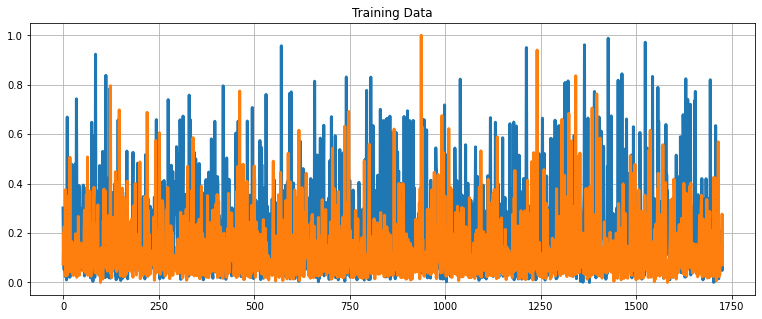

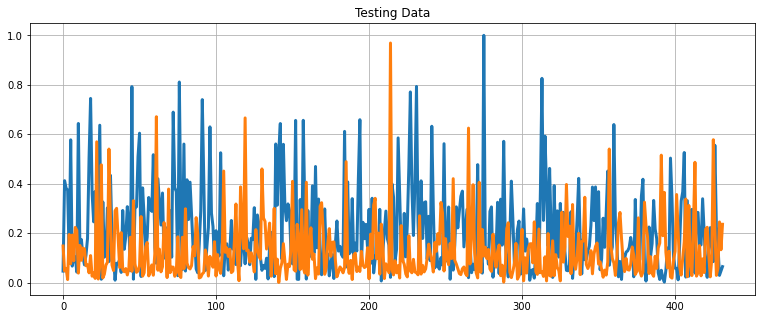

In [93]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [94]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
lr_accuracy1 = regression_model.score(X_test, y_test)
lr_accuracy1

0.9973846872519113

In [96]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [97]:
lr_accuracy2 = regressor1.score(X_test, y_test)
lr_accuracy2

0.996948709615735

In [98]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
lr_accuracy3 = regressor2.score(X_test, y_test)
lr_accuracy3

0.9024985415627249

In [100]:
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01541902],
       [0.01475672],
       [0.01633453],
       ...,
       [0.98571612],
       [0.95837033],
       [0.97410331]])

In [101]:
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [102]:
close = []
for i in price_volume_target_scaled_df_AAPL:
  close.append(i[0])

In [103]:
df_predicted = price_volume_target_df_AAPL[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [104]:
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [105]:
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.015419
1,2012-01-13,0.010462,0.014757
2,2012-01-17,0.012209,0.016335
3,2012-01-18,0.013785,0.017607
4,2012-01-19,0.013299,0.017252
...,...,...,...
2153,2020-08-04,0.957606,0.944363
2154,2020-08-05,0.961583,0.948677
2155,2020-08-06,1.000000,0.985716
2156,2020-08-07,0.972088,0.958370


In [106]:
interactive_plot(df_predicted, "Original Vs. Prediction")

In [120]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [121]:
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [122]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [123]:
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [124]:
X = np.asarray(X)
y = np.asarray(y)

In [125]:
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [126]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [129]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 150)            91200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 150)            180600    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [130]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0321 - val_loss: 0.0685
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0082 - val_loss: 0.0103
Epoch 3/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 6.9474e-04
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 4.0398e-04 - val_loss: 1.5507e-04
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 3.7785e-04 - val_loss: 2.2265e-04
Epoch 6/20
38/38 [==============================] - 0s 10ms/step - loss: 3.6086e-04 - val_loss: 1.1636e-04
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 3.0853e-04 - val_loss: 1.6456e-04
Epoch 8/20
38/38 [==============================] - 0s 10ms/step - loss: 3.3793e-04 - val_loss: 2.1255e-04
Epoch 9/20
38/38 [==============================] - 0s 10ms/step - loss: 2.9539e-04 - val_loss: 1.3668e-04
Epoch 10/20
38/38 [==============================] - 0s 1

In [131]:
predicted = model.predict(X)
predicted

array([[ 2.7098395e-03],
       [-3.5491027e-04],
       [ 1.8348787e-03],
       ...,
       [ 9.5290130e-01],
       [ 9.5380825e-01],
       [ 9.5773607e-01]], dtype=float32)

In [132]:
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [133]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [134]:
df_predicted['predictions'] = test_predicted

In [135]:
close = []
for i in training_set_scaled:
  close.append(i[0])

In [136]:
df_predicted['Close'] = close[1:]

In [137]:
interactive_plot(df_predicted, "Original Vs Prediction")